In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import cointegration_mult as mult
import Cointegration as coint

importlib.reload(coint)
importlib.reload(mult)

<module 'cointegration_mult' from 'D:\\trades\\pairs_trading_b3\\cointegration_mult.py'>

In [8]:
def plot_pairs(pairs, data):
    for i, row in pairs.iterrows():
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        period = row['Period']
        mult.plot_residue3(data, y_symbol, x_symbol, period)

In [3]:
path_data_cart = 'datasets/data_cart.csv'
path_data_yahoo = 'datasets/data_yahoo.csv'
path_data = 'datasets/data.csv'

In [4]:
data = pd.read_csv(path_data_yahoo, index_col=0)
data = data[::-1]
pairs = pd.read_csv('datasets/cointegrated_pairs_mult.csv')

print('{} to {}'.format(data.index[-1], data.index[0]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

2019-05-02 to 2020-07-13
data: (298, 74)
pairs: (2151, 12)


In [5]:
pairs

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,ABEV3,AZUL4,-3.093405,95,0.118353,10,0.632773,1.278939,Short/Long,3,"100,240,250"
1,100,ABEV3,B3SA3,-4.849140,99,0.220362,2,0.655613,0.183888,Long/Short,1,100
2,250,ABEV3,BBAS3,-2.995222,95,0.225892,10,0.573726,0.974151,Short/Long,6,"100,160,200,220,240,250"
3,250,ABEV3,BBDC3,-3.109886,95,0.344738,10,0.572527,1.008082,Short/Long,9,"100,120,140,160,180,200,220,240,250"
4,250,ABEV3,BBDC4,-3.093867,95,0.353484,10,0.554674,0.894916,Short/Long,9,"100,120,140,160,180,200,220,240,250"
...,...,...,...,...,...,...,...,...,...,...,...,...
2146,240,VIVT4,WEGE3,-2.975764,95,0.443316,11,0.360209,0.762603,Long/Short,8,"100,120,140,160,180,200,220,240"
2147,250,VIVT4,YDUQ3,-4.620495,99,0.345817,4,0.331312,0.450596,Long/Short,9,"100,120,140,160,180,200,220,240,250"
2148,240,VVAR3,WEGE3,-2.910037,95,0.569052,12,0.565362,0.217024,Short/Long,1,240
2149,180,VVAR3,YDUQ3,-3.191910,95,0.371705,7,0.569442,1.033145,Short/Long,5,"100,120,140,160,180"


In [126]:
pairs_signal = pairs.loc[
    (pairs['Signal'] >= 1) \
    & (pairs['Signal'] <= 1.2) \
    & (pairs['PeriodQt'] >= 9) \
    & (pairs['ADF'] >= 99) \
    & (pairs['HalfLife'] <= 6) \
].sort_values(by=['HalfLife'], ascending=True).copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,CMIG4,ENGI11,-4.257065,99,0.298534,5,0.768918,1.023665,Short/Long,9,"100,120,140,160,180,200,220,240,250"
1,250,BRKM5,LAME4,-4.066723,99,1.197584,6,0.554915,1.082008,Long/Short,9,"100,120,140,160,180,200,220,240,250"
2,250,BTOW3,VALE3,-4.099739,99,1.741104,6,0.557591,1.196672,Short/Long,9,"100,120,140,160,180,200,220,240,250"
3,250,ELET3,PCAR3,-4.496931,99,0.477546,6,0.314905,1.105713,Short/Long,9,"100,120,140,160,180,200,220,240,250"


Plot o gráficos dos resíduos de 'pairs_signal'

In [135]:
#plot_pairs(pairs_signal, data)

In [59]:
#pairs_signal.to_csv('datasets/sinais/sinais_06072020.csv', index=False)

In [136]:
#pairs_signal.iloc[[0,1,3]].to_csv('datasets/oper/13072020.csv', index=False)

# Análise das operações abertas

In [6]:
oper = pd.read_csv('datasets/oper/13072020.csv')
oper

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,CMIG4,ENGI11,-4.257065,99,0.298534,5,0.768918,1.023665,Short/Long,9,"100,120,140,160,180,200,220,240,250"
1,250,BRKM5,LAME4,-4.066723,99,1.197584,6,0.554915,1.082008,Long/Short,9,"100,120,140,160,180,200,220,240,250"
2,250,ELET3,PCAR3,-4.496931,99,0.477546,6,0.314905,1.105713,Short/Long,9,"100,120,140,160,180,200,220,240,250"


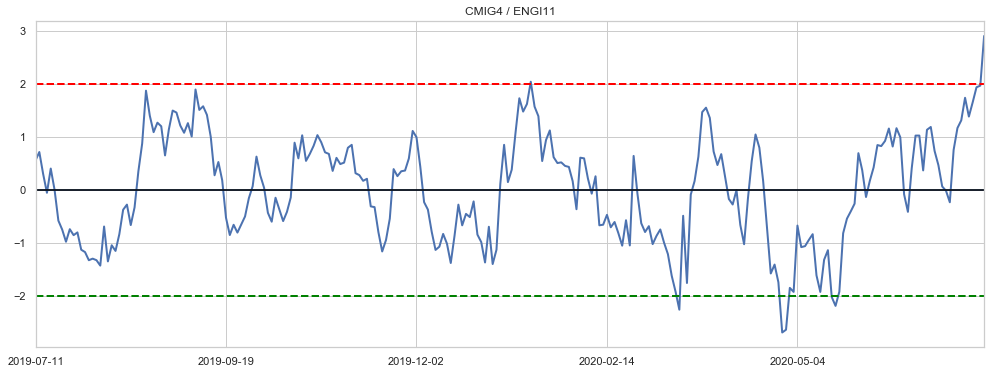

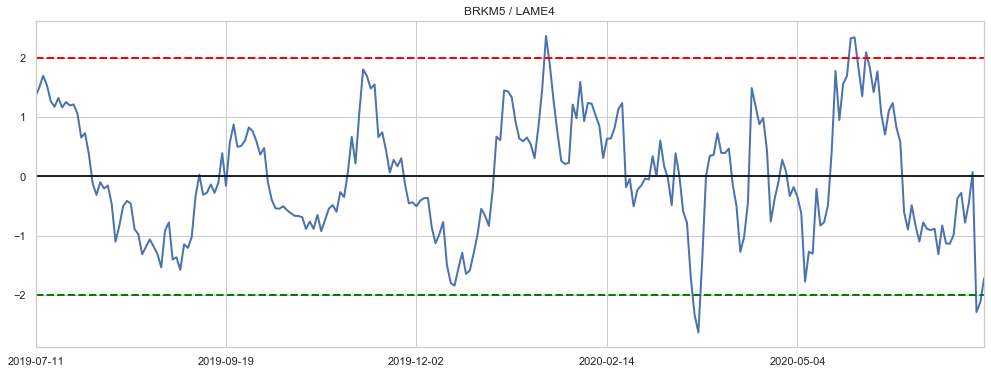

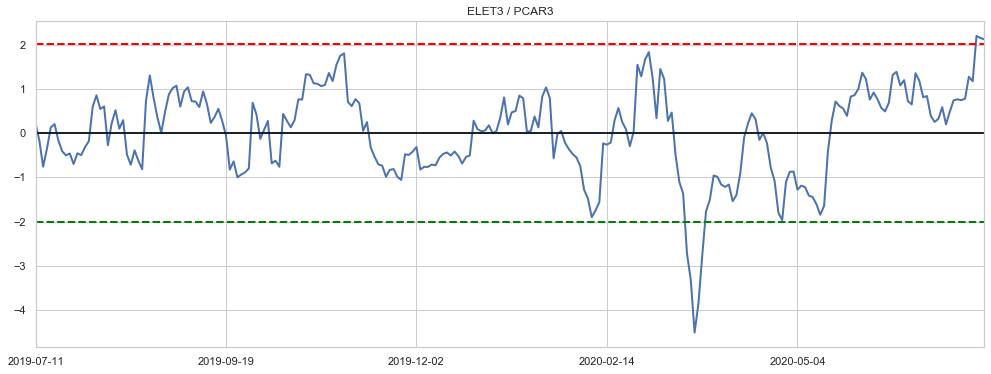

In [10]:
plot_pairs(oper, data)

In [11]:
mult.summary(data, 'CMIG4', 'ENGI11', 250)
mult.summary(data, 'BRKM5', 'LAME4', 250)
mult.summary(data, 'ELET3', 'PCAR3', 250)

Período de Análise                   250   Entrada      Venda:CMIG4 / Compra:ENGI11
Independente                       CMIG4   Dependente                        ENGI11
R$                                 11.67   R$                                 46.31
Ratio                0.25199740294165784   
→ CASH NEUTRAL ←
CMIG4                          -396.8295   Financeiro R$                 -4631.0003
ENGI11                               100   Financeiro R$                     4631.0
                                                                            -0.0003
→ BETA NEUTRAL ←
ENGI11                                29   Financeiro R$                    1342.99
CMIG4                               -100   Financeiro R$                    -1167.0
                                                                             175.99
Somente para operação Beta Neutral:
Retorno  (%)          11.626080124023265   Gain                  196.56909522301297
Atual    (%)          16.843966918416477   Los

In [160]:
#data[['CMIG4', 'ENGI11', 'BRKM5', 'LAME4', 'ELET3', 'PCAR3']].to_excel('datasets/xlsx/ENGI11.xlsx')

In [286]:
y_symbol = 'BRKM5'
x_symbol = 'LAME4'

In [247]:
y_symbol = 'ELET3'
x_symbol = 'PCAR3'

In [260]:
y_symbol = 'CMIG4'
x_symbol = 'ENGI11'

In [273]:
y_symbol = 'ENGI11'
x_symbol = 'VVAR3'

In [287]:
y = data[y_symbol]
x = data[x_symbol]

In [288]:
mult.coefficients(y, x, 250)

{'temp': -0.10635820462154257,
 'angular': 1.1895458871722553,
 'intercept': 13.23495040058463}

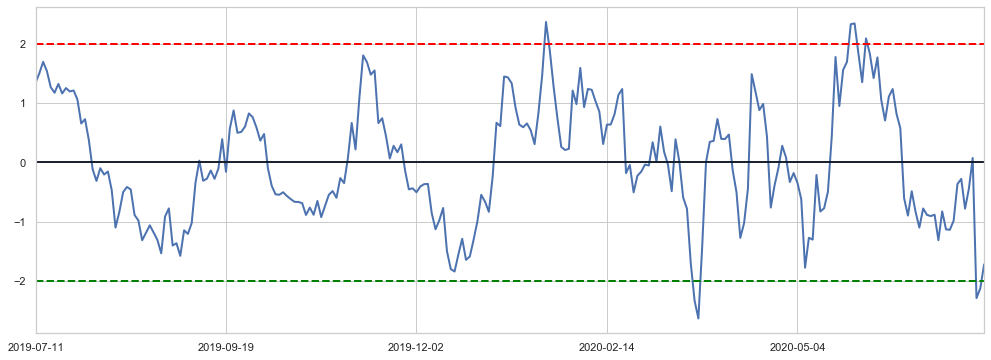

In [289]:
mult.plot_residue(mult.residue(data[y_symbol], data[x_symbol], 250))

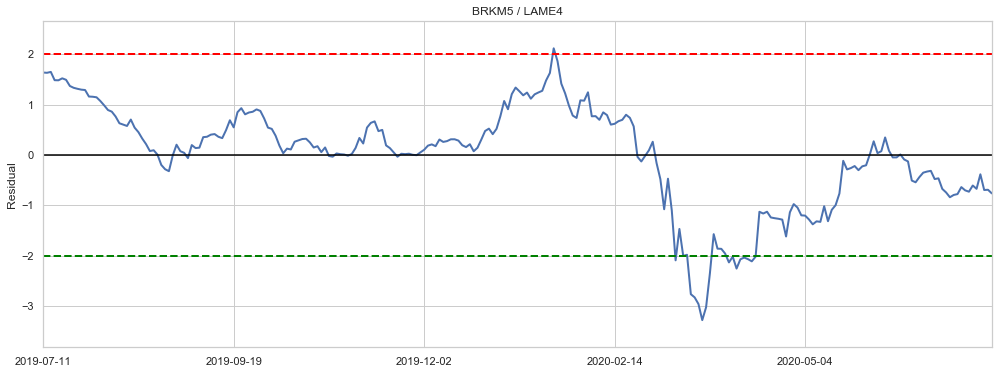

In [291]:
coint.show(data[::-1], y_symbol, x_symbol)

In [292]:
reg.bse

const    0.863710
x        0.048100
temp     0.003237
dtype: float64

In [293]:
reg.pvalues

const    1.053936e-37
x        8.962317e-69
temp     3.845339e-92
dtype: float64

In [294]:
reg.tvalues

const    15.323369
x        24.730739
temp    -32.858862
dtype: float64

In [295]:
reg.params

const    13.234950
x         1.189546
temp     -0.106358
dtype: float64

In [296]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     540.3
Date:                Mon, 13 Jul 2020   Prob (F-statistic):           6.32e-91
Time:                        23:41:26   Log-Likelihood:                -567.23
No. Observations:                 250   AIC:                             1140.
Df Residuals:                     247   BIC:                             1151.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.2350      0.864     15.323      0.0

In [297]:
p_values = reg.summary2().tables[1]['P>|t|']
p_values

const    1.053936e-37
x        8.962317e-69
temp     3.845339e-92
Name: P>|t|, dtype: float64

In [298]:
if(p_values['temp'] < 0.05):
    print('Sim')
else:
    print('Não')

Sim
